<a href="https://colab.research.google.com/github/SidSolanki28/HR-Department/blob/master/HR_Department.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
# important packages
	
import pandas as pd					# data manipulation using dataframes
import numpy as np					# data statistical analysis

import seaborn as sns				# Statistical data visualization
import matplotlib.pyplot as plt		# data visualisation
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing Dataset

In [2]:
raw_df = pd.read_csv("/content/Human_Resources.csv")			# to import .csv file

In [3]:
df = raw_df.copy()			# copy of initial dataset

# Data Inspection

In [4]:
df.shape			# to get dimensions of the table

(1470, 35)

In [5]:
df.head()			# to get first 5 rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
df.tail()			# to get last 5 rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
df.info()			# for concise summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [11]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [12]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

# Data Cleaning

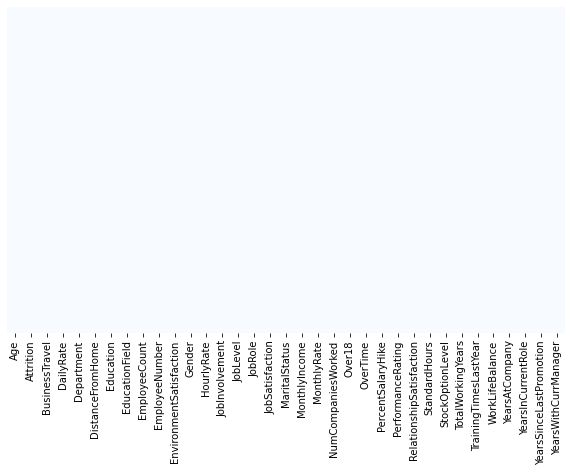

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues' )
plt.show()

# Explanatory Data Analysis

### Change label and Yes/No columns to binary [0/1] to extract numerical informatiom.

In [14]:
df1 = df.copy()

In [15]:
df1['Attrition'] = df1['Attrition'].map({'Yes': 1, 'No': 0})
df1['Over18'] = df1['Over18'].map({'Y': 1, 'N': 0})
df1['OverTime'] = df1['OverTime'].map({'Yes': 1, 'No': 0})

### Checking distribution of numerical features

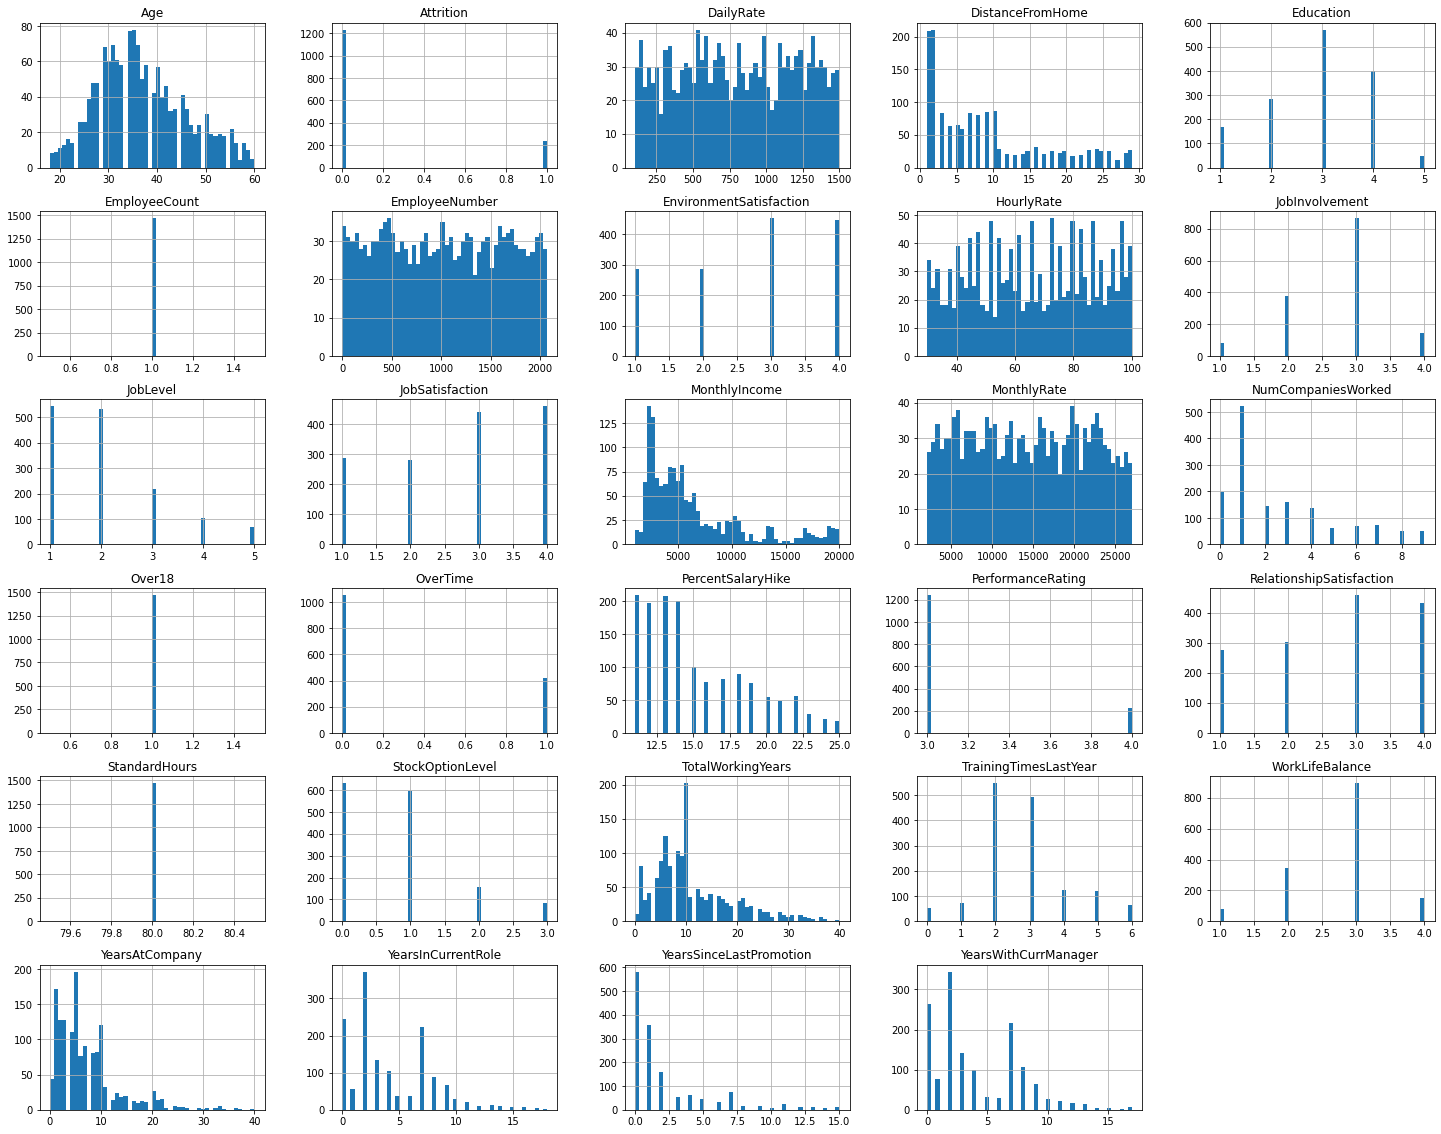

In [16]:
df1.hist( bins = 50, figsize = (25,20))
plt.show()

Drop following columns which are not changing with x-axis i.e. number of employees 

'EmployeeCount', 'Over18', 'StandardHours'

In [17]:
df2 = df1.copy()

In [18]:
df2 = df2.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis = 1)

Remove column with nominal data which is 'Employee Number'

Nominal data : data which is used to distinguish the individuals from one another but does not carry any information

In [19]:
df2 = df2.drop(['EmployeeNumber'], axis = 1)

Tail heavily features :
   
'Distance from home', 'Monthly income', 'Percent Salary hike', 'Years at company', 'Years since last promotion'

### Univariate Analysis : Target

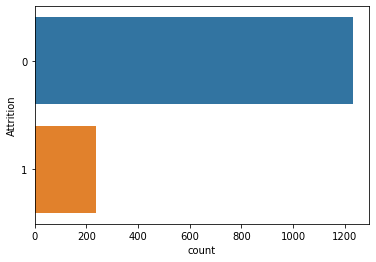

In [20]:
sns.countplot(y="Attrition", data=df2, order = df2['Attrition'].value_counts().index)
plt.show()

In [21]:
stayed_df = df2[df2['Attrition'] == 0]
left_df = df2[df2['Attrition'] == 1]

print(f'Total Employees = {len(df)}')
print(f'Employees who left = {len(left_df)/len(df)*100:.2f}%')
print(f'Employees who stayed = {len(stayed_df)/len(df)*100:.2f}%')

Total Employees = 1470
Employees who left = 16.12%
Employees who stayed = 83.88%


It is clear this is imbalance dataset

In [22]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [23]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


'Age', 'Daily rate' 'Total working years', 'work life balance', 'Years with current manager' of employess who stayed is higher.

'Distance from home', 'Overtime work' for employees who left is more.

'Environmental Satisfaction', 'Jon involvement', 'Job satisfaction', 'Relationship Satisfaction', 'Years since last promotion' for employees who left is less


### Calculate correlations

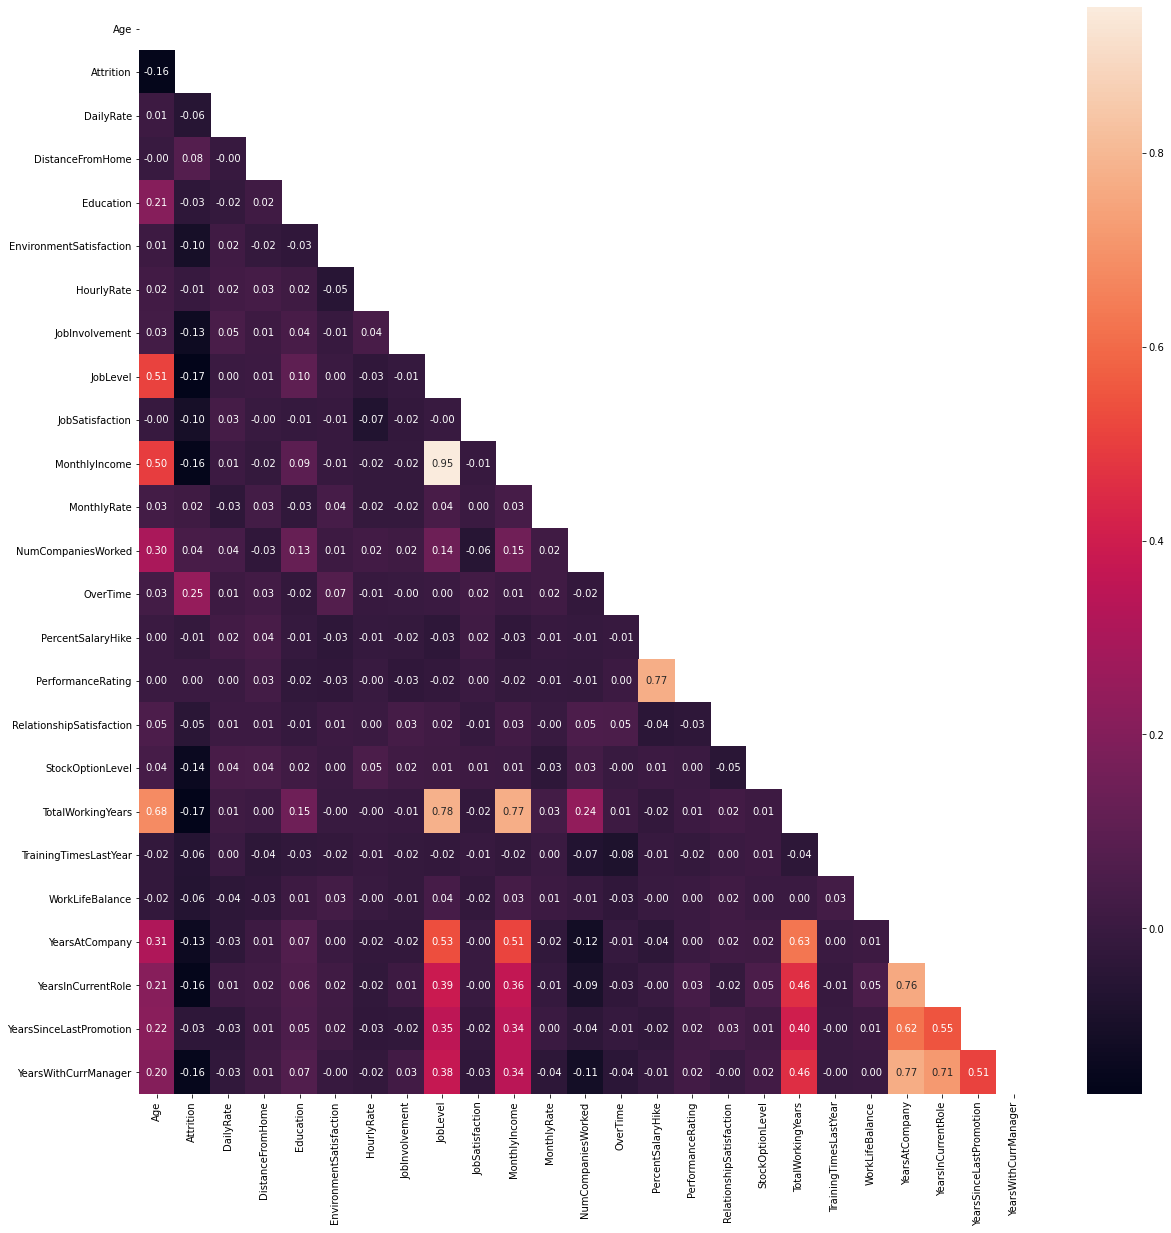

In [24]:
corr = df2.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
 
# Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr,  annot=True, fmt=".2f", mask = mask)
plt.show()

'Age' is highly correlated with 'Total Working Years'.

'Monthly income' is highly correlated with 'Job Level'

'Performance Rating' is highly correlated with 'Performance Salary hike'

'Total working years' is highly correlated with 'Job level' and 'Monthly income'

'Years in current role', 'Years since last promotion', 'Years with current manager' if highly correlated t each other 

These correlations are obvious because as Age, total working years increases. More Job level means more income. Good performance means more salary hike.

### Categorical features analysis

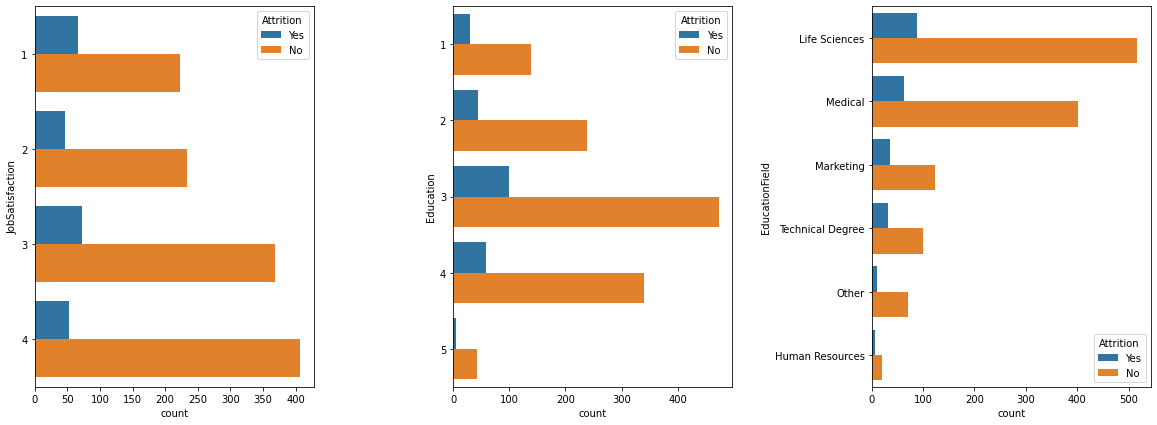

In [25]:
plt.figure(figsize=(20,7))
plt.subplots_adjust(wspace=0.5)
plt.subplot(131)
sns.countplot(y = 'JobSatisfaction', hue = 'Attrition', data = df)#, order = df['Department'].value_counts().index)
plt.subplot(132)
sns.countplot(y = 'Education', hue = 'Attrition', data = df)# order = df['Education'].value_counts().index)
plt.subplot(133)
sns.countplot(y = 'EducationField', hue = 'Attrition', data = df, order = df['EducationField'].value_counts().index)

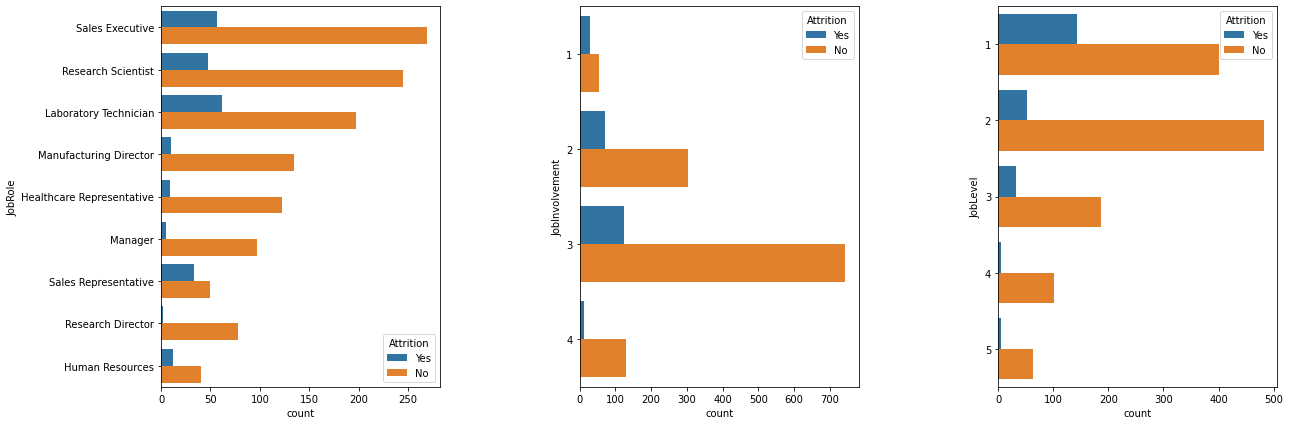

In [26]:
plt.figure(figsize=(20,7))
plt.subplots_adjust(wspace=0.5)
plt.subplot(131)
sns.countplot(y = 'JobRole', hue = 'Attrition', data = df, order = df['JobRole'].value_counts().index)
plt.subplot(132)
sns.countplot(y = 'JobInvolvement', hue = 'Attrition', data = df)# order = df['JobInvolvement'].value_counts().index)
plt.subplot(133)
sns.countplot(y = 'JobLevel', hue = 'Attrition', data = df, order = df['JobLevel'].value_counts().index)

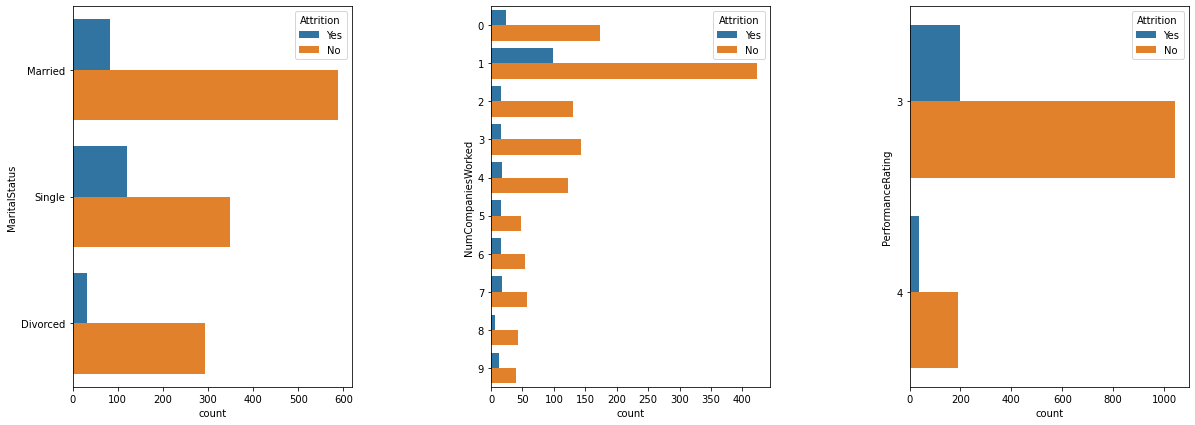

In [27]:
plt.figure(figsize=(20,7))
plt.subplots_adjust(wspace=0.5)
plt.subplot(131)
sns.countplot(y = 'MaritalStatus', hue = 'Attrition', data = df, order = df['MaritalStatus'].value_counts().index)
plt.subplot(132)
sns.countplot(y = 'NumCompaniesWorked', hue = 'Attrition', data = df)# order = df['JobInvolvement'].value_counts().index)
plt.subplot(133)
sns.countplot(y = 'PerformanceRating', hue = 'Attrition', data = df, order = df['PerformanceRating'].value_counts().index)

### Numerical feature analysis

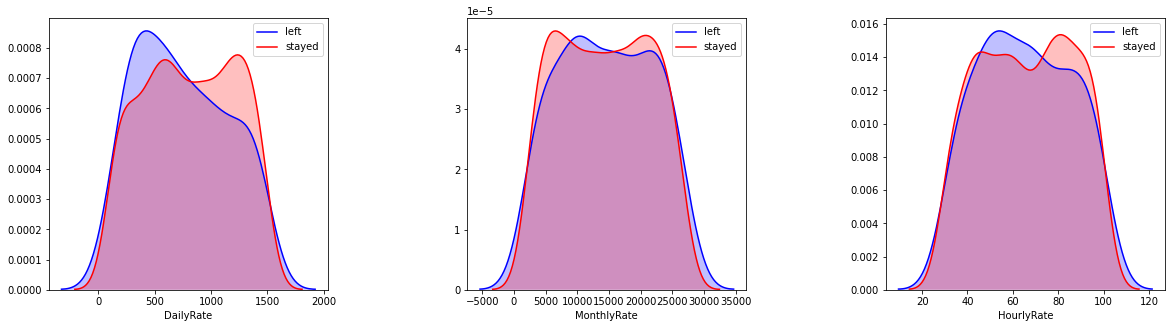

In [28]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.subplots_adjust(wspace=0.5)
plt.xlabel('DailyRate')
sns.kdeplot(left_df.DailyRate, shade = True, label = 'left', color = 'b')
sns.kdeplot(stayed_df.DailyRate, shade = True, label = 'stayed' , color = 'r')
plt.subplot(132)
plt.xlabel('MonthlyRate')
sns.kdeplot(left_df.MonthlyRate, shade = True, label = 'left', color = 'b')
sns.kdeplot(stayed_df.MonthlyRate, shade = True, label = 'stayed' , color = 'r')
plt.subplot(133)
plt.xlabel('HourlyRate')
sns.kdeplot(left_df.HourlyRate, shade = True, label = 'left', color = 'b')
sns.kdeplot(stayed_df.HourlyRate, shade = True, label = 'stayed' , color = 'r')

Employee with more hourly, daily and monthly rate stayed in company.

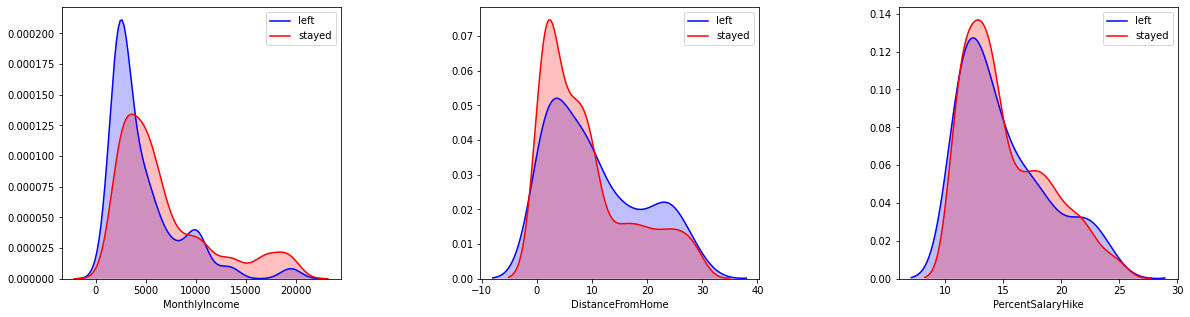

In [29]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.subplots_adjust(wspace=0.5)
plt.xlabel('MonthlyIncome')
sns.kdeplot(left_df.MonthlyIncome, shade = True, label = 'left', color = 'b')
sns.kdeplot(stayed_df.MonthlyIncome, shade = True, label = 'stayed' , color = 'r')
plt.subplot(132)
plt.xlabel('DistanceFromHome')
sns.kdeplot(left_df.DistanceFromHome, shade = True, label = 'left', color = 'b')
sns.kdeplot(stayed_df.DistanceFromHome, shade = True, label = 'stayed' , color = 'r')
plt.subplot(133)
plt.xlabel('PercentSalaryHike')
sns.kdeplot(left_df.PercentSalaryHike, shade = True, label = 'left', color = 'b')
sns.kdeplot(stayed_df.PercentSalaryHike, shade = True, label = 'stayed' , color = 'r')

Employee with less monthly income left

Employee with more distance from home usually left

Employee with salary hike stayed

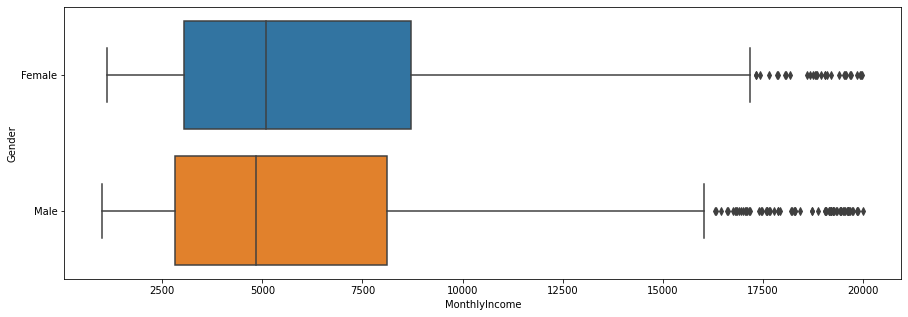

In [30]:
plt.figure(figsize=(15, 5))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = df)
plt.show()

Female get paid more as comapred to male.

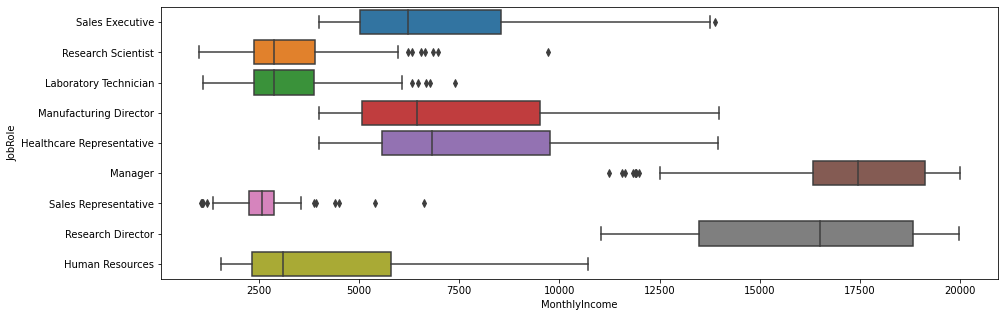

In [31]:
plt.figure(figsize=(15, 5))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = df)
plt.show()

Research Director and Manager are paid much more as compared to other jobs.

# Data Preprocessing

### Define X&Y ###

In [32]:
df2.shape

(1470, 31)

In [33]:
df2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [34]:
y = df2['Attrition']
y.shape

(1470,)

In [35]:
df_drop = df2.drop(['Attrition'], axis = 1)
X = df_drop.iloc[:,:].values
X.shape

(1470, 30)

### One - Hot Encoding

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 3, 6, 8, 12, 14])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [37]:
df2.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [38]:
X = pd.DataFrame(X)
X.shape

(1470, 50)

In [39]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


### Normalization

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(X)

### Splitting Dataset

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2, random_state = 42)

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1176, 50)
(1176,)
(294, 50)
(294,)


# Model Training

### Logistic Regression

Model Training

In [43]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Model Prediction

In [44]:
y_pred = classifier.predict(X_test)

Accuracy

In [45]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
acc = accuracy_score(y_test, y_pred)

print(f'accuracy : {acc*100:.2f}%')

accuracy : 89.12%


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

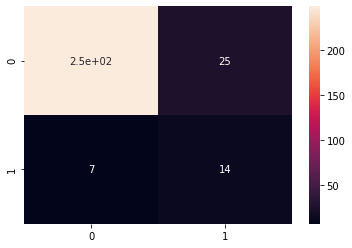

In [46]:
sns.heatmap(cm, annot=True)
plt.show()

Classification Report

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       255
           1       0.67      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.79      0.67      0.70       294
weighted avg       0.88      0.89      0.88       294



### KNN

Find best k value

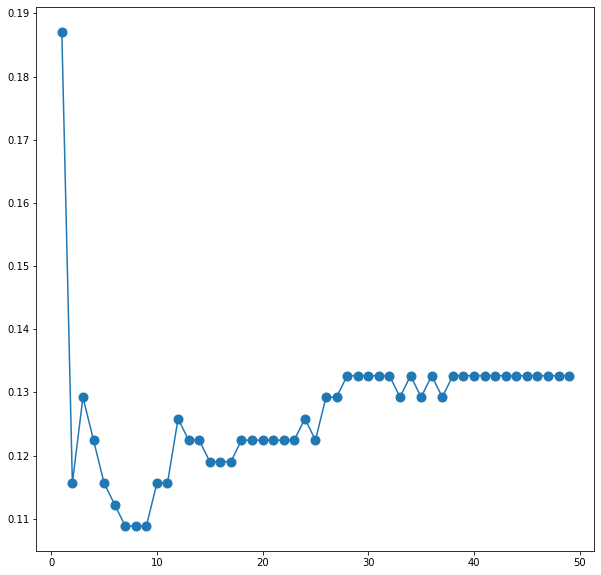

In [56]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(10,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)
plt.show()

Model Training

In [57]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)

classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

Model Prediction

In [58]:
y_pred = classifier.predict(X_test)

Accuracy

In [60]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
acc = accuracy_score(y_test, y_pred)

print(f'accuracy : {acc:.2f}%')

accuracy : 0.88%


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

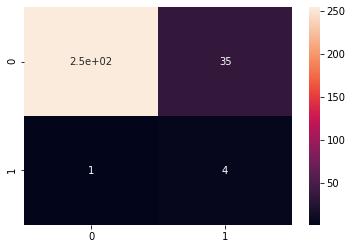

In [61]:
sns.heatmap(cm, annot=True)
plt.show()

Classification Report

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



### SVM

Model Traning

In [63]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)

classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Model Prediction

In [64]:
y_pred = classifier.predict(X_test)

Accuracy

In [65]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print(f'accuracy : {acc:.2f}%')

accuracy : 0.90%


Confusion Matrix

[[247   8]
 [ 22  17]]


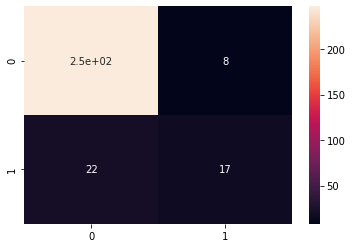

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
sns.heatmap(cm, annot=True)
plt.show()

Classification report

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       255
           1       0.68      0.44      0.53        39

    accuracy                           0.90       294
   macro avg       0.80      0.70      0.74       294
weighted avg       0.89      0.90      0.89       294



### Kernel SVM

Model Training

In [68]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)

classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Model Prediction

In [69]:
y_pred = classifier.predict(X_test)

Accuracy

In [70]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print(f'accuracy : {acc:.2f}%')

accuracy : 0.90%


Confusion Matrix

[[254   1]
 [ 29  10]]


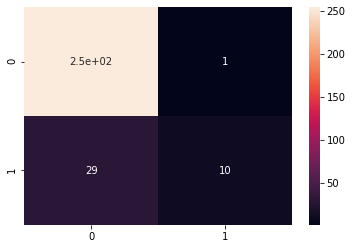

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
sns.heatmap(cm, annot=True)
plt.show()

Classification report

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94       255
           1       0.91      0.26      0.40        39

    accuracy                           0.90       294
   macro avg       0.90      0.63      0.67       294
weighted avg       0.90      0.90      0.87       294



### Naive Bayes

Model Training

In [73]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Model Prediction

In [74]:
y_pred = classifier.predict(X_test)

Accuracy

In [75]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print(f'accuracy : {acc:.2f}%')

accuracy : 0.67%


Confusion Matrix

[[174  81]
 [ 15  24]]


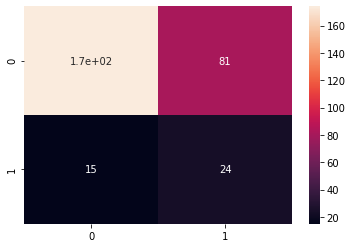

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
sns.heatmap(cm, annot=True)
plt.show()

Classification report

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.68      0.78       255
           1       0.23      0.62      0.33        39

    accuracy                           0.67       294
   macro avg       0.57      0.65      0.56       294
weighted avg       0.83      0.67      0.72       294



### Decision Tree

Model Training

In [78]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Model Prediction

In [79]:
y_pred = classifier.predict(X_test)

Accuracy

In [80]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print(f'accuracy : {acc:.2f}%')

accuracy : 0.77%


Confusion Matrix

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[219  36]
 [ 32   7]]


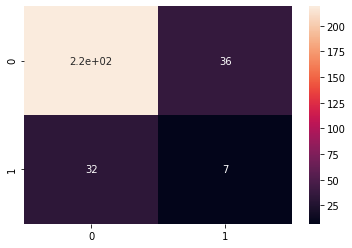

In [83]:
sns.heatmap(cm, annot=True)
plt.show()

Classification Report

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       255
           1       0.16      0.18      0.17        39

    accuracy                           0.77       294
   macro avg       0.52      0.52      0.52       294
weighted avg       0.78      0.77      0.77       294



### Random Forest

Model Training

In [85]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Model Prediction

In [86]:
y_pred = classifier.predict(X_test)

Accuracy

In [88]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print(f'accuracy : {acc:.2f}%')

accuracy : 0.86%


Confusion Matrix

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[251   4]
 [ 36   3]]


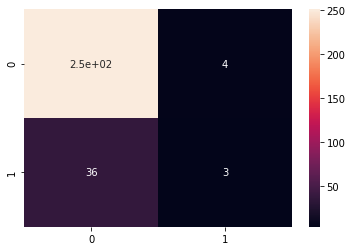

In [90]:
sns.heatmap(cm, annot=True)
plt.show()

Classification Report

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.93       255
           1       0.43      0.08      0.13        39

    accuracy                           0.86       294
   macro avg       0.65      0.53      0.53       294
weighted avg       0.82      0.86      0.82       294



### ANN

In [92]:
import tensorflow as tf

In [93]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(50, )))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [94]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               25500     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 501       
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [95]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [96]:
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50)

Epoch 1/100
24/24 [==============================] - 0s 9ms/step - loss: 0.4204 - accuracy: 0.8138
Epoch 2/100
24/24 [==============================] - 0s 9ms/step - loss: 0.3199 - accuracy: 0.8759
Epoch 3/100
24/24 [==============================] - 0s 8ms/step - loss: 0.2824 - accuracy: 0.8903
Epoch 4/100
24/24 [==============================] - 0s 8ms/step - loss: 0.2536 - accuracy: 0.8997
Epoch 5/100
24/24 [==============================] - 0s 8ms/step - loss: 0.2176 - accuracy: 0.9150
Epoch 6/100
24/24 [==============================] - 0s 9ms/step - loss: 0.1973 - accuracy: 0.9184
Epoch 7/100
24/24 [==============================] - 0s 8ms/step - loss: 0.2106 - accuracy: 0.9218
Epoch 8/100
24/24 [==============================] - 0s 8ms/step - loss: 0.1819 - accuracy: 0.9218
Epoch 9/100
24/24 [==============================] - 0s 8ms/step - loss: 0.1155 - accuracy: 0.9600
Epoch 10/100
24/24 [==============================] - 0s 8ms/step - loss: 0.0972 - accuracy: 0.9643
Epoch 11/

In [97]:
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

In [98]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

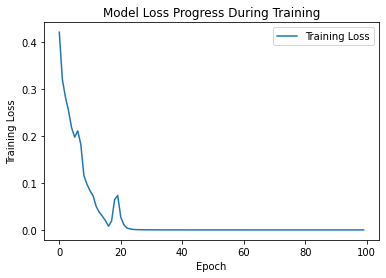

In [99]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

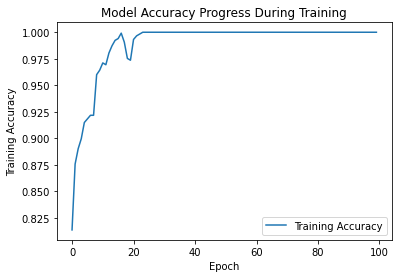

In [100]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

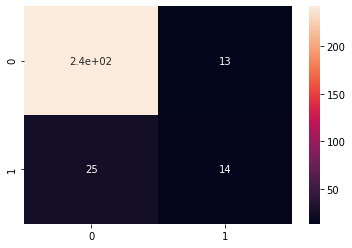

In [101]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [102]:
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       255
           1       0.52      0.36      0.42        39

    accuracy                           0.87       294
   macro avg       0.71      0.65      0.68       294
weighted avg       0.85      0.87      0.86       294

